In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
Factors_return = pd.read_csv('./Analysis/factors_returns_multi.csv')
Factors_return

,Date,Momentum_1,Momentum_2,Momentum_3,Turnover,Volitility_1,Volitility_2,Volitility_3,Financial Quality,EP,...,industry_Communication Services,industry_Consumer Cyclical,industry_Consumer Defensive,industry_Energy,industry_Financial Services,industry_Healthcare,industry_Industrials,industry_Real Estate,industry_Technology,industry_Utilities
0,2021-01-04,-0.000795,0.000431,0.010126,0.006979,0.002579,-0.013686,0.009344,0.004963,-0.002787,...,-0.021614,-0.017928,-0.005862,0.002847,-0.012672,0.013397,-0.016968,-0.018927,-0.004714,0.012233
1,2021-01-05,0.009653,0.001557,0.002534,0.006160,-0.000822,-0.011292,0.015103,-0.003752,0.000723,...,0.007001,0.015566,0.014331,0.070967,0.017131,0.012329,0.025755,0.018174,0.018871,0.003485
2,2021-01-06,0.001416,0.015122,0.003851,-0.002416,0.002329,-0.017773,0.006406,-0.004380,0.007129,...,0.010104,0.024612,0.009293,0.029657,0.026667,0.025183,0.027230,0.013878,0.012383,0.031718
3,2021-01-07,0.006909,-0.001387,0.008013,0.006365,0.003263,-0.012190,0.013480,-0.003109,-0.002411,...,0.016774,0.017361,0.007740,-0.003910,0.018629,0.022768,0.021406,0.017958,0.038580,0.079520
4,2021-01-08,0.008419,-0.002217,0.005940,0.004608,0.004967,-0.009766,0.002858,0.000709,-0.007839,...,0.007881,-0.009199,-0.000279,-0.022656,0.007165,0.009236,-0.001328,0.016051,0.000408,-0.008056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,2022-10-25,0.007261,-0.004478,-0.002469,-0.001621,-0.001568,-0.000331,0.017086,0.001496,-0.002764,...,0.028455,0.030122,0.021137,0.001072,0.031899,0.024560,0.021943,0.039304,0.032101,0.047587
457,2022-10-26,0.009413,0.000120,0.000476,-0.002894,0.000672,0.006392,0.003670,-0.000924,0.000217,...,-0.013080,0.002327,0.026824,0.012649,0.008268,0.012645,0.010934,-0.013669,-0.001342,0.006129
458,2022-10-27,0.012840,0.000719,0.002848,-0.003953,-0.001818,0.010321,-0.008587,-0.005546,0.000744,...,-0.014210,-0.005443,-0.014927,-0.016334,-0.000424,-0.013374,-0.002253,0.002058,0.004658,0.022445
459,2022-10-28,0.007325,0.001664,0.001086,-0.001627,-0.001792,0.006404,0.004762,0.001139,0.000554,...,0.016501,0.011174,0.016205,0.000548,0.025698,0.019668,0.024573,0.018100,0.019627,0.039932


In [51]:
Factors_return.columns

Index(['Date', 'Momentum_1', 'Momentum_2', 'Momentum_3', 'Turnover',
       'Volitility_1', 'Volitility_2', 'Volitility_3', 'Financial Quality',
       'EP', 'BP', 'industry_Basic Materials',
       'industry_Communication Services', 'industry_Consumer Cyclical',
       'industry_Consumer Defensive', 'industry_Energy',
       'industry_Financial Services', 'industry_Healthcare',
       'industry_Industrials', 'industry_Real Estate', 'industry_Technology',
       'industry_Utilities'],
      dtype='object')

In [67]:
factor_cols = ['Momentum_1', 'Momentum_2', 'Momentum_3', 'Turnover',
       'Volitility_1', 'Volitility_2', 'Volitility_3', 'Financial Quality',
       'EP', 'BP', 'industry_Basic Materials',
       'industry_Communication Services', 'industry_Consumer Cyclical',
       'industry_Consumer Defensive', 'industry_Energy',
       'industry_Financial Services', 'industry_Healthcare',
       'industry_Industrials', 'industry_Real Estate', 'industry_Technology',
       'industry_Utilities']
len(factor_cols)

21

In [68]:
# Factors_return = Factors_return.drop(['Date'], axis=1)
# Factors_return = Factors_return[factor_cols]

In [85]:
Factors_return[0:61]

,Date,Momentum_1,Momentum_2,Momentum_3,Turnover,Volitility_1,Volitility_2,Volitility_3,Financial Quality,EP,...,industry_Communication Services,industry_Consumer Cyclical,industry_Consumer Defensive,industry_Energy,industry_Financial Services,industry_Healthcare,industry_Industrials,industry_Real Estate,industry_Technology,industry_Utilities
0,2021-01-04,-0.000795,0.000431,0.010126,0.006979,0.002579,-0.013686,0.009344,0.004963,-0.002787,...,-0.021614,-0.017928,-0.005862,0.002847,-0.012672,0.013397,-0.016968,-0.018927,-0.004714,0.012233
1,2021-01-05,0.009653,0.001557,0.002534,0.006160,-0.000822,-0.011292,0.015103,-0.003752,0.000723,...,0.007001,0.015566,0.014331,0.070967,0.017131,0.012329,0.025755,0.018174,0.018871,0.003485
2,2021-01-06,0.001416,0.015122,0.003851,-0.002416,0.002329,-0.017773,0.006406,-0.004380,0.007129,...,0.010104,0.024612,0.009293,0.029657,0.026667,0.025183,0.027230,0.013878,0.012383,0.031718
3,2021-01-07,0.006909,-0.001387,0.008013,0.006365,0.003263,-0.012190,0.013480,-0.003109,-0.002411,...,0.016774,0.017361,0.007740,-0.003910,0.018629,0.022768,0.021406,0.017958,0.038580,0.079520
4,2021-01-08,0.008419,-0.002217,0.005940,0.004608,0.004967,-0.009766,0.002858,0.000709,-0.007839,...,0.007881,-0.009199,-0.000279,-0.022656,0.007165,0.009236,-0.001328,0.016051,0.000408,-0.008056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-25,0.006175,0.005715,0.001170,0.005212,0.001780,-0.001153,0.001373,-0.005246,0.001476,...,0.007651,0.033075,0.018956,-0.010093,0.015892,0.020797,0.015544,0.014109,0.010734,0.033474
57,2021-03-26,0.012610,-0.002807,-0.001516,-0.003621,-0.003749,-0.003209,0.005055,0.006486,-0.005863,...,-0.008660,0.008898,0.004528,0.080536,0.008521,-0.002738,0.024836,0.014877,0.027576,-0.011036
58,2021-03-29,0.006360,-0.003481,0.004803,-0.002369,-0.001848,-0.004681,0.000467,0.002222,0.004980,...,-0.003306,-0.033791,-0.022163,-0.002999,-0.024013,-0.018218,-0.022901,-0.026422,-0.031137,-0.018814
59,2021-03-30,-0.001455,0.003076,0.005381,0.003098,-0.005213,-0.004026,0.014370,-0.002697,0.002807,...,0.019438,0.015572,0.013804,-0.025149,0.013832,0.014737,0.026999,0.019064,0.010832,-0.001127


### Prepare training data:

In [87]:
# option 1: split for training and testing data for LSTM (with validation set):
train_data = Factors_return.loc[(Factors_return['Date'] >= '2021-01-01') & (Factors_return['Date'] <= '2022-07-31')].drop(['Date'], axis=1)
val_data = Factors_return.loc[(Factors_return['Date'] >= '2022-08-01') & (Factors_return['Date'] <= '2022-09-30')].drop(['Date'], axis=1)
test_data = Factors_return.loc[(Factors_return['Date'] >= '2022-10-01') & (Factors_return['Date'] <= '2022-10-31')].drop(['Date'], axis=1)
train_data.shape, val_data.shape, test_data.shape

((396, 21), (44, 21), (21, 21))

In [89]:
# option 2: use all data from 2021-01 to 2022-10 for train
train_data = Factors_return.drop(['Date'], axis=1)
train_data.shape

(461, 21)

In [209]:
# option 3: split for training and testing data for LSTM (no val set):
train_data = Factors_return.loc[(Factors_return['Date'] >= '2021-01-01') & (Factors_return['Date'] <= '2022-07-31')].drop(['Date'], axis=1)
test_data = Factors_return.loc[(Factors_return['Date'] >= '2022-08-01') & (Factors_return['Date'] <= '2022-10-31')].drop(['Date'], axis=1)
train_data.shape, test_data.shape

((396, 21), (65, 21))

In [210]:
scaler = MinMaxScaler(feature_range=(0, 1))
scale_flag = False

In [212]:
x_train, y_train = [], []

if scale_flag:
    train_data = scaler.fit_transform(train_data)
    for i in range(60, train_data.shape[0]):
        x_train.append(train_data[i-60: i])
        y_train.append(train_data[i])

    x_train, y_train = np.array(x_train), np.array(y_train)
else:
    for i in range(60, train_data.shape[0]):
        x_train.append(train_data.loc[i-60: i-1].to_numpy())
        y_train.append(train_data.iloc[i].to_numpy())

    x_train, y_train = np.array(x_train), np.array(y_train)


x_train.shape, y_train.shape

((336, 60, 21), (336, 21))

### LSTM model:

In [213]:
lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
lstm.add(LSTM(units=50))
lstm.add(Dense(y_train.shape[1]))

lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 50)            14400     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 21)                1071      
                                                                 
Total params: 35,671
Trainable params: 35,671
Non-trainable params: 0
_________________________________________________________________


In [214]:
history_lstm = lstm.fit(x_train, y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
68/68 - 6s - loss: 2.0353e-04 - 6s/epoch - 95ms/step
Epoch 2/30
68/68 - 3s - loss: 2.0490e-04 - 3s/epoch - 38ms/step
Epoch 3/30
68/68 - 4s - loss: 2.0091e-04 - 4s/epoch - 57ms/step
Epoch 4/30
68/68 - 2s - loss: 2.0262e-04 - 2s/epoch - 35ms/step
Epoch 5/30
68/68 - 2s - loss: 1.9945e-04 - 2s/epoch - 34ms/step
Epoch 6/30
68/68 - 2s - loss: 1.9839e-04 - 2s/epoch - 35ms/step
Epoch 7/30
68/68 - 2s - loss: 2.0445e-04 - 2s/epoch - 33ms/step
Epoch 8/30
68/68 - 3s - loss: 1.9851e-04 - 3s/epoch - 44ms/step
Epoch 9/30
68/68 - 3s - loss: 1.9667e-04 - 3s/epoch - 38ms/step
Epoch 10/30
68/68 - 2s - loss: 1.9850e-04 - 2s/epoch - 35ms/step
Epoch 11/30
68/68 - 2s - loss: 1.9603e-04 - 2s/epoch - 33ms/step
Epoch 12/30
68/68 - 2s - loss: 1.9825e-04 - 2s/epoch - 33ms/step
Epoch 13/30
68/68 - 2s - loss: 1.9716e-04 - 2s/epoch - 33ms/step
Epoch 14/30
68/68 - 2s - loss: 1.9713e-04 - 2s/epoch - 33ms/step
Epoch 15/30
68/68 - 2s - loss: 1.9646e-04 - 2s/epoch - 37ms/step
Epoch 16/30
68/68 - 2s - loss: 1.9

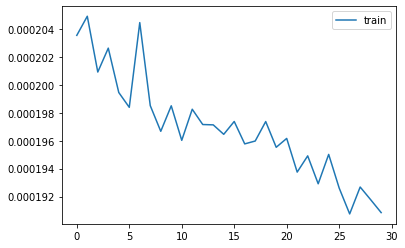

In [215]:
plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
plt.legend()
plt.show()

### Predict (m8-m10):

In [216]:
Factors_test = Factors_return.loc[Factors_return.shape[0]-test_data.shape[0]-60:].reset_index(drop=True).drop(['Date'], axis=1)


In [217]:
x_test, y_test = [], []

if scale_flag:
    test_data = scaler.fit_transform(Factors_test)
    for i in range(60, test_data.shape[0]):
        x_test.append(test_data[i-60: i])
        y_test.append(test_data[i])

    x_test, y_test = np.array(x_test), np.array(y_test)
else:
    for i in range(60, Factors_test.shape[0]):
        x_test.append(Factors_test.loc[i-60: i-1].to_numpy())
        y_test.append(Factors_test.iloc[i].to_numpy())

    x_test, y_test = np.array(x_test), np.array(y_test)

x_test.shape, y_test.shape

((65, 60, 21), (65, 21))

In [218]:
y_predict = lstm.predict(x_test)

3/3 [==============================] - 1s 11ms/step


In [219]:
y_predict.shape

(65, 21)

In [220]:
if scale_flag:
    y_predict = scaler.inverse_transform(y_predict)

In [221]:
print("Testing R-squared: ", metrics.r2_score(y_test,y_predict))
print("Testing Explained Variation: ", metrics.explained_variance_score(y_test,y_predict))
print('Testing Mean Squared Error:', metrics.mean_squared_error(y_test,y_predict))
print("Testing RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("Testing MAE: ", metrics.mean_absolute_error(y_test,y_predict))
print(' ')

Testing R-squared:  -0.06924820471062482
Testing Explained Variation:  0.005135230361581177
Testing Mean Squared Error: 0.0002382720917275741
Testing RMSE:  0.015436064645095721
Testing MAE:  0.010592351346112592
 


In [222]:
predict_df = pd.DataFrame(y_predict, columns=factor_cols)

In [223]:
dates_pred = Factors_return.loc[Factors_return.shape[0]-predict_df.shape[0]:]['Date'].values
dates_pred
predict_df.insert(0,'Date',dates_pred)

In [224]:
predict_df

,Date,Momentum_1,Momentum_2,Momentum_3,Turnover,Volitility_1,Volitility_2,Volitility_3,Financial Quality,EP,...,industry_Communication Services,industry_Consumer Cyclical,industry_Consumer Defensive,industry_Energy,industry_Financial Services,industry_Healthcare,industry_Industrials,industry_Real Estate,industry_Technology,industry_Utilities
0,2022-08-01,0.004040,-0.000531,0.001538,-0.001107,-0.005339,0.001760,0.001529,0.001163,0.001513,...,0.003097,-0.000635,0.002525,0.006312,0.002027,0.002110,0.003959,0.004832,0.004128,-0.003008
1,2022-08-02,0.003475,-0.000489,0.001459,-0.000874,-0.006070,0.001720,0.002159,0.000941,0.001832,...,0.003522,-0.000246,0.003127,0.005673,0.002629,0.002739,0.004375,0.005196,0.004506,-0.003425
2,2022-08-03,0.003115,0.000214,0.001461,-0.000865,-0.006033,0.001347,0.002269,0.000891,0.001606,...,0.004275,0.000650,0.003800,0.005554,0.003380,0.003073,0.004818,0.005324,0.005052,-0.002428
3,2022-08-04,0.002866,0.001193,0.001665,-0.000804,-0.005872,0.000582,0.001978,0.001193,0.000541,...,0.003366,0.000287,0.003895,0.005710,0.003215,0.002432,0.004328,0.004125,0.004088,-0.001402
4,2022-08-05,0.002693,0.001590,0.002305,-0.000381,-0.007237,-0.000842,0.003116,0.001102,-0.000240,...,0.000799,-0.001694,0.002451,0.004198,0.001692,0.001584,0.002339,0.001681,0.001235,-0.002510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2022-10-25,0.006122,0.000085,0.000703,-0.000518,0.001211,0.002591,-0.001924,-0.000292,0.001048,...,0.001695,-0.001706,0.000958,0.003419,0.000686,0.002807,0.001110,0.002138,0.001924,0.000834
61,2022-10-26,0.005943,0.000564,0.000473,-0.001138,0.001395,0.002799,-0.003602,0.000372,0.000445,...,-0.000269,-0.003509,0.000313,0.005015,-0.000625,0.001334,0.000190,0.000668,0.000539,0.000436
62,2022-10-27,0.005454,0.000874,0.000362,-0.001211,-0.000082,0.002870,-0.003343,0.000547,0.000619,...,-0.000309,-0.004245,0.000080,0.005306,-0.000712,0.000678,-0.000172,0.000527,0.000132,-0.000501
63,2022-10-28,0.004997,0.000690,0.000520,-0.000877,-0.001613,0.002482,-0.002408,0.000514,0.000885,...,-0.001183,-0.005039,-0.001008,0.005359,-0.001485,0.000379,-0.000820,-0.000420,-0.000860,-0.002275


In [225]:
Factors_return.loc[(Factors_return['Date'] >= '2022-08-01') & (Factors_return['Date'] <= '2022-10-31')]

,Date,Momentum_1,Momentum_2,Momentum_3,Turnover,Volitility_1,Volitility_2,Volitility_3,Financial Quality,EP,...,industry_Communication Services,industry_Consumer Cyclical,industry_Consumer Defensive,industry_Energy,industry_Financial Services,industry_Healthcare,industry_Industrials,industry_Real Estate,industry_Technology,industry_Utilities
396,2022-08-01,0.006638,-0.001528,0.003205,-0.002745,-0.002812,0.000631,0.000801,-0.000854,0.001638,...,-0.007621,0.004108,0.016389,-0.001769,0.003318,-0.010655,-0.001570,-0.007154,-0.000207,0.005118
397,2022-08-02,0.004354,0.003390,-0.001374,0.004584,-0.004260,0.007535,-0.000433,-0.007618,0.002390,...,0.012420,-0.003369,0.009511,0.008527,0.000867,0.008712,-0.005727,-0.009456,0.005407,0.031976
398,2022-08-03,0.011647,0.005730,-0.005046,0.004467,-0.008021,-0.003627,0.015464,-0.007030,0.001681,...,0.024844,0.010937,0.014302,-0.031563,0.021882,0.020591,0.018916,0.006508,0.027950,0.026020
399,2022-08-04,0.010431,0.012834,-0.004862,0.001995,0.001963,-0.008376,0.002439,-0.009942,-0.000942,...,0.001695,-0.001272,-0.007960,-0.039168,0.002882,0.016941,0.009790,-0.003280,-0.001408,-0.017492
400,2022-08-05,0.008342,0.001652,0.000368,-0.003760,-0.000071,-0.001958,0.013712,-0.001978,0.002179,...,-0.000222,-0.013274,0.015948,0.026892,0.010859,0.023816,0.007072,0.011244,-0.002355,0.012427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,2022-10-25,0.007261,-0.004478,-0.002469,-0.001621,-0.001568,-0.000331,0.017086,0.001496,-0.002764,...,0.028455,0.030122,0.021137,0.001072,0.031899,0.024560,0.021943,0.039304,0.032101,0.047587
457,2022-10-26,0.009413,0.000120,0.000476,-0.002894,0.000672,0.006392,0.003670,-0.000924,0.000217,...,-0.013080,0.002327,0.026824,0.012649,0.008268,0.012645,0.010934,-0.013669,-0.001342,0.006129
458,2022-10-27,0.012840,0.000719,0.002848,-0.003953,-0.001818,0.010321,-0.008587,-0.005546,0.000744,...,-0.014210,-0.005443,-0.014927,-0.016334,-0.000424,-0.013374,-0.002253,0.002058,0.004658,0.022445
459,2022-10-28,0.007325,0.001664,0.001086,-0.001627,-0.001792,0.006404,0.004762,0.001139,0.000554,...,0.016501,0.011174,0.016205,0.000548,0.025698,0.019668,0.024573,0.018100,0.019627,0.039932


In [229]:
predict_df.to_csv("./Predict/factors_returns_pred.csv", index=False)